In [149]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\train.csv')

In [150]:
def cretate(data_f, the_f_list, feature_list, features_list):
    the_data = data_f
    l = len(the_f_list)
    for i in range(l):
        the_data = the_data[the_data[feature_list[i]] == the_f_list[i]]
    length = len(the_data)
    if(length == 0):
        ans_list = [[the_f_list, length, "N/A", "N/A"]]
    else:
        ans_list = [[the_f_list, length, len(the_data[the_data["Exited"] == 0])/length
                     , len(the_data[the_data["Exited"] == 1])/length]]        
    if(len(the_f_list) < len(feature_list)):
        for feature in features_list[l]:
            ans_list += cretate(data_f,the_f_list + [feature] , feature_list, features_list)
    return ans_list

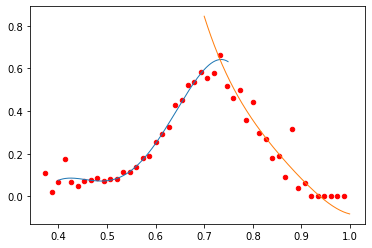

In [151]:
data_list = cretate(data, [], ["Age"], [list(range(28,76))])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x[x["number"] > 0]
x = x.iloc[1:48]
#這是原始的退出機率散佈圖(針對年齡)
plt.scatter(np.array(list(range(28,75)))/75,x["ratio of exit"],s=20, color = "red")
##二次回歸的準備
from scipy.optimize import curve_fit
def sigmoid(x, Beta_1, Beta_2, Beta_3, Beta_4, Beta_5):
    y = Beta_1 + Beta_2*x + Beta_3*x*x+ Beta_4*x*x*x + Beta_5*x*x*x*x
    return y
#這是28至55歲顧客的退出機率的二次回歸
x = np.array(data["Age"][data["Age"] <= 55])
y = np.array(data["Exited"][data["Age"] <= 55])
X = x/75
popt, pcov = curve_fit(sigmoid, X, y)
x = np.array(list(range(400,750)))/1000
plt.plot(x ,sigmoid(x, *popt) , linewidth=1, label='fit')
#這是55至75歲顧客的退出機率二次回歸
x2 = np.array(data["Age"][data["Age"] >= 55])
y2 = np.array(data["Exited"][data["Age"] >= 55])
X2 = x2/75
popt2, pcov2 = curve_fit(sigmoid, X2, y2)
x = np.array(list(range(700,1000)))/1000
plt.plot(x ,sigmoid(x, *popt2) , linewidth=1, label='fit')

In [152]:
del data["CustomerId"]
del data["Surname"]
del data["RowNumber"]
Age = np.array(data["Age"])
result1 = sigmoid(Age/75, *popt)
result1[Age > 55] = 0
result2 = sigmoid(Age/75, *popt2)
result2[Age <= 55] = 0
result = result2 + result1
feature = ['Geography', 'Gender']
data = pd.get_dummies(data, columns = feature)
data["Ages"] = result
data["CreditScore"] = data["CreditScore"]/1000
del data["Age"]
data["EstimatedSalary"] = data["EstimatedSalary"]/200000
data["Balance"] = data["Balance"]/200000
y = np.array(data["Exited"])
del data["Exited"]
X = np.array(data)
data

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Ages
0,0.720,5,0.570260,2,0,1,0.537886,0,0,1,0,1,0.075556
1,0.682,4,0.311987,1,1,0,0.565443,1,0,0,1,0,0.632452
2,0.672,5,0.599518,1,1,1,0.664626,1,0,0,1,0,0.083590
3,0.592,4,0.521289,1,1,0,0.554287,0,0,1,1,0,0.096925
4,0.753,5,0.601939,1,0,1,0.631893,0,0,1,0,1,0.140592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.568,6,0.605398,2,1,1,0.624452,1,0,0,1,0,0.075322
7996,0.602,7,0.729230,1,1,0,0.496380,0,1,0,1,0,0.247736
7997,0.679,5,0.664050,1,1,0,0.653904,0,0,1,1,0,0.171054
7998,0.715,4,0.593647,1,0,0,0.477423,1,0,0,0,1,0.075556


In [153]:
clf = RandomForestClassifier(random_state=0, n_estimators = 200)
clf.fit(X, y)

RandomForestClassifier(n_estimators=200, random_state=0)

In [154]:
predict = clf.predict(X)
answer = y + 0
test = (predict + answer - 1)**2
print(test.mean(),predict)
print(sum(predict * answer)/sum(predict))
print(sum(predict * answer)/sum(answer))
print(predict.mean())

1.0 [0 1 0 ... 1 0 0]
1.0
1.0
0.204


In [155]:
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\test.csv')
del data["CustomerId"]
del data["Surname"]
del data["RowNumber"]
Age = np.array(data["Age"])
result1 = sigmoid(Age/75, *popt)
result1[Age > 55] = 0
result2 = sigmoid(Age/75, *popt2)
result2[Age <= 55] = 0
result = result2 + result1
feature = ['Geography', 'Gender']
data["Ages"] = result
data["CreditScore"] = data["CreditScore"]/1000
del data["Age"]
data["EstimatedSalary"] = data["EstimatedSalary"]/200000
data["Balance"] = data["Balance"]/200000
data = pd.get_dummies(data, columns = feature)
X = np.array(data)
data

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Ages,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.726,3,0.311987,1,0,0,0.530697,0.083623,1,0,0,1,0
1,0.661,3,0.651698,1,1,0,0.628882,0.140592,1,0,0,0,1
2,0.545,6,0.311987,2,1,1,0.391861,0.079586,1,0,0,0,1
3,0.731,3,0.433585,1,1,0,0.680131,0.140592,0,0,1,1,0
4,0.533,6,0.311987,1,1,1,0.676028,0.490264,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.628,6,0.311987,2,1,1,0.481005,0.075322,1,0,0,0,1
1996,0.639,5,0.490772,2,1,0,0.547658,0.115860,0,1,0,0,1
1997,0.548,3,0.595392,2,1,1,0.583628,0.292659,1,0,0,1,0
1998,0.602,7,0.311987,2,1,1,0.640680,0.206946,0,0,1,1,0


In [156]:
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\test.csv')
predict = clf.predict(X)
print(predict.mean())
data["predict"] = predict
Exited = data["predict"]
RowNumber = data["RowNumber"]
upload = np.array([RowNumber,Exited])
upload = upload.transpose()
upload = list(upload)
upload
x = pd.DataFrame(upload, columns = ["RowNumber", "Exited"])
x.to_csv('third_try.csv')

0.305
